In [14]:
import cv2
import matplotlib.pyplot as plt
import os
import glob
import pickle

In [15]:
precision = 8

In [16]:
img = cv2.imread('datasets/retouched/image-aaronburden-oVfRbUwLJ80.jpg')

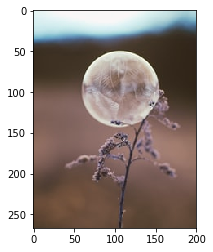

In [17]:
plt.imshow(img)

In [18]:
posterizedImage = img * ((2**precision)/(2**8))
posterizedImage = (posterizedImage.astype(int)*(2**8/2**precision)).astype(int)

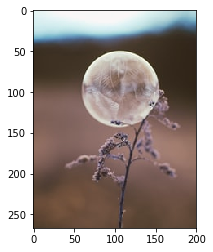

In [19]:
plt.imshow(posterizedImage)

In [30]:
def getHistograms(image):
    channels = []
    pixelCount = image.shape[0] * image.shape[1]
    for channel in range(3):
        channels.append(cv2.calcHist([img],[channel],None,[2**precision],[0,256])/pixelCount)
    return channels

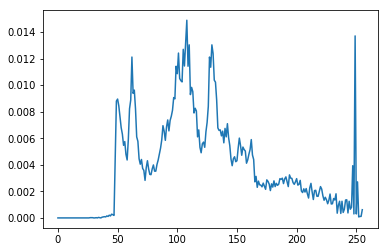

In [31]:
plt.plot(getHistograms(img)[0])

In [38]:
def saveHistogramsForDirectory(path):
    files = glob.glob(os.path.join(path,'*.jpg'))
    result = []
    for filePath in files:
        img = cv2.imread(filePath)
        if img is not None:
            histograms = getHistograms(img)
            result.append((filePath,histograms))
    pickle.dump(result, open( os.path.join(path,"histograms.p"), "w+b" ))

In [39]:
saveHistogramsForDirectory("datasets/retouched")
saveHistogramsForDirectory("datasets/natural")